In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import ast
import os
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def str_to_list(s):
    return ast.literal_eval(s)

fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        #'style': 'italic',
        'size': 22,
        }

fontlegend = font_manager.FontProperties(family='serif',
                                   weight='heavy',
                                   #style = 'italic', 
                                   size = 16)

def med_curve(Cx,Cy):
    # Encontre o tamanho máximo das listas Cy
    tamanho_maximo = max(len(curva) for curva in Cy)

    # Inicialize os vetores médios
    media_x = np.zeros(tamanho_maximo)
    media_y = np.zeros(tamanho_maximo)

    # Calcule a média das curvas
    for x, y in zip(Cx, Cy):
        tamanho_curva = len(y)

        # Use interpolação linear para igualar o tamanho dos vetores x e y
        x_interp = np.linspace(min(x), max(x), tamanho_maximo)
        y_interp = np.interp(x_interp, x, y)

        # Some os valores interpolados aos vetores médios
        media_x += x_interp
        media_y += y_interp

    # Divida os vetores médios pelo número de curvas para obter a média
    media_x /= len(Cy)
    media_y /= len(Cy)

    return media_x, media_y


reading data for Ts = 8


<function matplotlib.pyplot.show(close=None, block=None)>

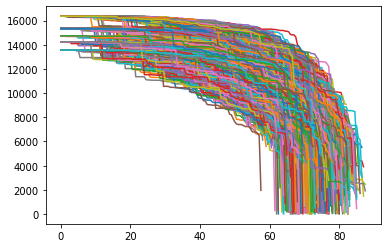

In [60]:
### Teste

i = 8
folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
string = 'ts_' + str(i)+ '_'
print('reading data for Ts = %d' %i)
extension = '.csv'
files = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the file is a regular file, contains the desired string in its name, and has the .csv extension
    if os.path.isfile(file_path) and string in filename and filename.endswith(extension):
        files.append(filename)
        #print(f"File name: {filename}")

li = []
Cx = []
Cy = []
#print(len(files))
for file in files:
    file = os.path.join(folder_path,file)
    df = pd.read_csv(file, delimiter=', ', engine= 'python')
    xd = df['F'].to_list()
    yd = df['num_active_particles'].to_list()
    Cx.append(xd)
    Cy.append(yd)
    plt.plot(xd,yd)
    li.append(df)

plt.show




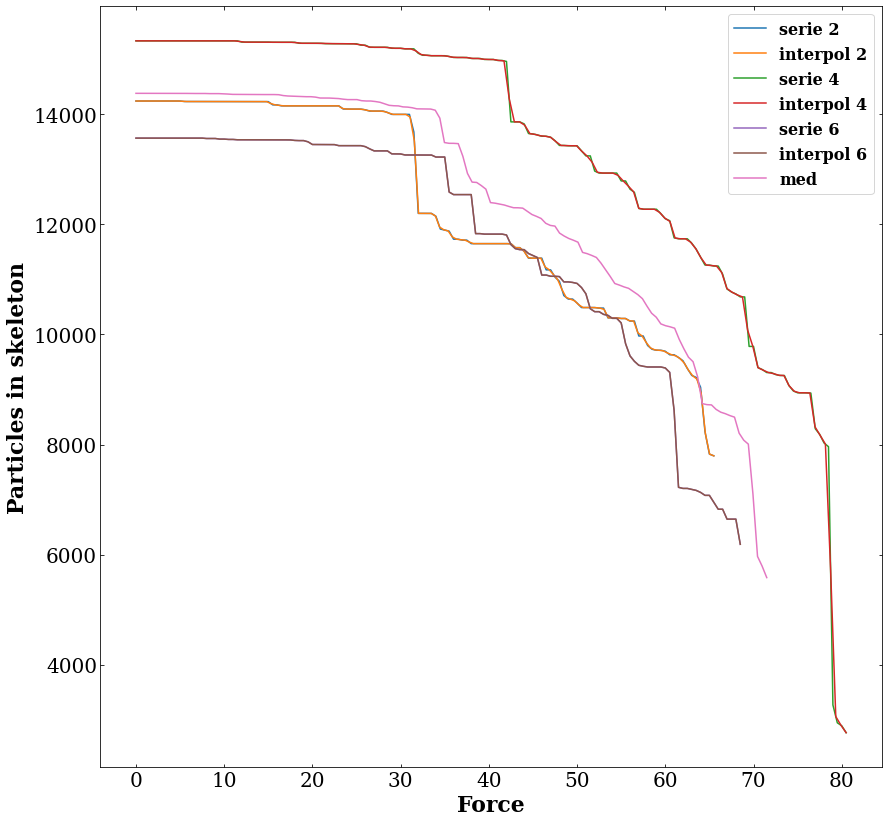

In [67]:
### Teste Interp

list = [2,4,6]
tamanho_maximo = len(Cx[6])
plt.figure(figsize= (14,14))
media_x = np.zeros(tamanho_maximo)
media_y = np.zeros(tamanho_maximo)

for i in list:
    x = Cx[i]
    y = Cy[i]
    plt.plot(x, y, label = 'serie %d' %int(i))
    
    # Use interpolação linear para igualar o tamanho dos vetores x e y
    x_interp = np.linspace(min(x), max(x), tamanho_maximo)
    y_interp = np.interp(x_interp, x, y)
    media_x += x_interp
    media_y += y_interp
    plt.plot(x_interp, y_interp, label = 'interpol %d' %int(i))
    
mx = media_x/len(list)
my = media_y/len(list)

plt.plot(mx, my, label = 'med' )
plt.legend(loc = 'best')
plt.xlabel('Force',fontdict=fontlabel)
plt.ylabel('Particles in skeleton',fontdict=fontlabel)
plt.legend( loc = 'upper right',prop=fontlegend)
plt.xticks(size = 20, family = 'serif', weight = 'normal')
plt.yticks(size = 20, family = 'serif', weight = 'normal')
plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )

plt.show()

In [ ]:
i = 2
x = Cx[i]
y = Cy[i]
tamanho_maximo = len(Cx[6])
# Use interpolação linear para igualar o tamanho dos vetores x e y
x_interp = np.linspace(min(x), max(x), tamanho_maximo)
y_interp = np.interp(x_interp, x, y)



In [68]:
### Codigo Certo
import os

Force, N, F_med, D = [],[], [], []
v = 201 * 17 * 17
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]
for i in ts:
   
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.csv'
    files = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is a regular file, contains the desired string in its name, and has the .csv extension
        if os.path.isfile(file_path) and string in filename and filename.endswith(extension):
            files.append(filename)
            #print(f"File name: {filename}")

    f_med = 0
    dens = 0
    li = []
    Cx, Cy = [], []
    for file in files:
        file = os.path.join(folder_path,file)
        df = pd.read_csv(file, delimiter=', ', engine= 'python')
        xd = df['F'].to_list()
        yd = df['num_active_particles'].to_list()
        Cx.append(xd)
        Cy.append(yd)
        sum_df = df.groupby('F').sum().reset_index()
        #print(sum_df)
        li.append(sum_df)
        f_med += sum_df.loc[sum_df.index[-1], 'F']
        dens += (sum_df.loc[sum_df.index[0], 'num_active_particles']/v)

    
    mx, my = med_curve(Cx,Cy)

    Force.append(mx)
    N.append(my/my[0])
    F_med.append(f_med/len(files))
    D.append(dens/len(files))

print(F_med)

reading data for Ts = 2
reading data for Ts = 8
reading data for Ts = 16
reading data for Ts = 64
reading data for Ts = 128
reading data for Ts = 512
reading data for Ts = 1024
reading data for Ts = 4096
reading data for Ts = 8192
reading data for Ts = 16384
[45.337, 71.75533333333334, 99.31066666666666, 162.69533333333334, 179.20433333333332, 188.76583333333335, 200.37833333333333, 206.08583333333334, 204.01116666666667, 190.81]


In [69]:
### Plot curve

plt.figure(figsize=(10,10))
for i in range(len(Force)):
    Force[i].append(Force[i][-1])
    N[i].append(0)
    plt.scatter(Force[i],N[i]/N[i][0], label = '%d'%ts[i])
    plt.xlabel('Force',fontdict=fontlabel)
    plt.ylabel('Particles in skeleton',fontdict=fontlabel)
    plt.legend( loc = 'upper right',prop=fontlegend)
    plt.xticks(size = 20, family = 'serif', weight = 'normal')
    plt.yticks(size = 20, family = 'serif', weight = 'normal')
    plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )

AttributeError: 'numpy.ndarray' object has no attribute 'append'

<Figure size 720x720 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


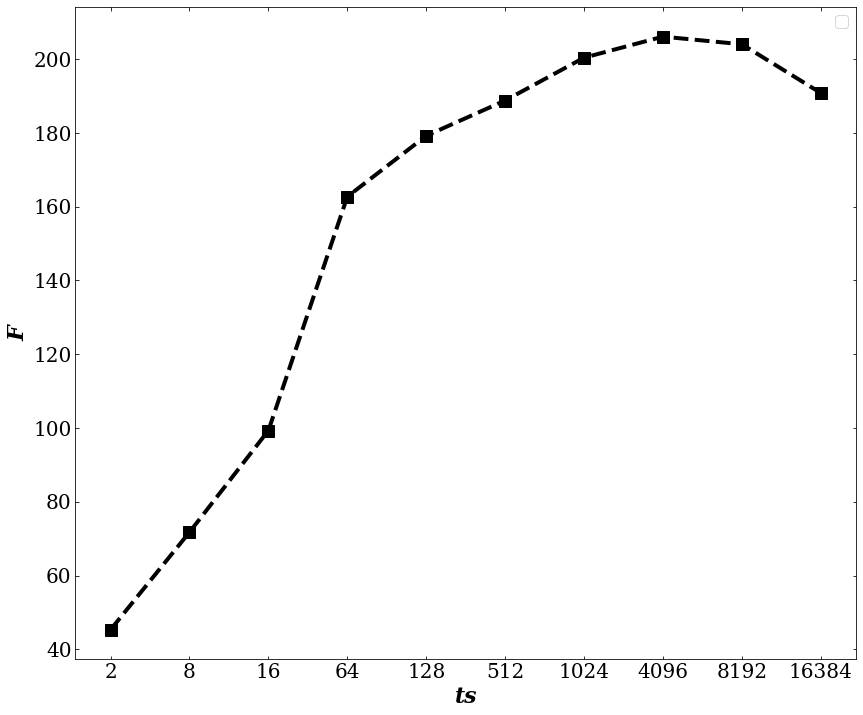

In [29]:
##Plot force max

plt.figure(figsize=(14,12))
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x ,F_med, color = 'black', linewidth = 4,linestyle='dashed',markersize=12, marker = 's')
plt.xlabel("ts",fontdict=fontlabel)
plt.ylabel('F',fontdict=fontlabel)
plt.legend( loc = 'best',prop=fontlegend)
plt.xticks(x,ts)
plt.xticks(size = 20, family = 'serif', weight = 'normal')
plt.yticks(size = 20, family = 'serif', weight = 'normal')
plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


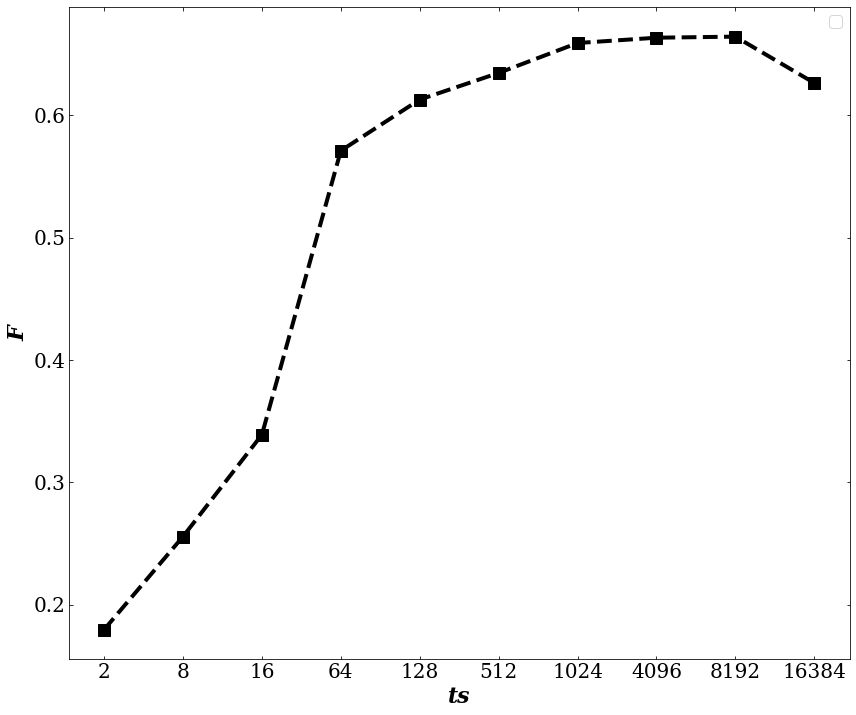

In [30]:
### Plot density

plt.figure(figsize=(14,12))
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x ,D, color = 'black', linewidth = 4,linestyle='dashed',markersize=12, marker = 's')
plt.xlabel("ts",fontdict=fontlabel)
plt.ylabel('F',fontdict=fontlabel)
plt.legend( loc = 'best',prop=fontlegend)
plt.xticks(x,ts)
plt.xticks(size = 20, family = 'serif', weight = 'normal')
plt.yticks(size = 20, family = 'serif', weight = 'normal')
plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )

In [15]:
### Ta certo 

ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]

for i in ts:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Substitua pelo caminho da sua pasta
    string = 'ts_' + str(i) + '_'
    print('reading data for Ts = %d' % i)
    extension = '.csv'
    files = []

    # Caminho para o arquivo de texto
    caminho_arquivo_txt = '/home/robert/data_zurik/avalanche/avalanche_ts_%d.txt' % i

    with open(caminho_arquivo_txt, 'w') as arquivo_txt:
        # Itera sobre cada arquivo na pasta
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Verifica se o arquivo é um arquivo regular, contém a string desejada no nome e tem a extensão .csv
            if os.path.isfile(file_path) and string in filename and filename.endswith(extension):
                files.append(filename)

        # Itera sobre cada arquivo encontrado para o valor de i atual
        for file in files:
            file = os.path.join(folder_path, file)
            dataframe = pd.read_csv(file)

            # Verifica se a coluna 'num_deleted_rods' existe no DataFrame
            if ' num_deleted_rods' in dataframe.columns:
                # Lê a coluna 'num_deleted_rods' em um vetor
                vetor = dataframe[' num_deleted_rods'].values
                #print(vetor)
                # Calcula a diferença entre o valor atual e o valor anterior e escreve no arquivo de texto
                for idx in range(1, len(vetor)):
                    diferenca = vetor[idx] - vetor[idx - 1]
                    if diferenca != 0:
                        arquivo_txt.write(str(diferenca) + '\n')
            else:
                print(f"Column 'num_deleted_rods' not found in file: {file}")


reading data for Ts = 2
reading data for Ts = 8
reading data for Ts = 16
reading data for Ts = 64
reading data for Ts = 128
reading data for Ts = 512
reading data for Ts = 1024
reading data for Ts = 4096
reading data for Ts = 8192
reading data for Ts = 16384


In [37]:
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]

f, r = [], []
for i in ts:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Substitua pelo caminho da sua pasta
    string = 'ts_' + str(i) + '_'
    print('reading data for Ts = %d' % i)
    extension = '.csv'
    files = []


    # Itera sobre cada arquivo na pasta
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Verifica se o arquivo é um arquivo regular, contém a string desejada no nome e tem a extensão .csv
        if os.path.isfile(file_path) and string in filename and filename.endswith(extension):
            files.append(filename)
            #print(filename)

    Cx, Cy = [], []
    # Itera sobre cada arquivo encontrado para o valor de i atual
    for file in files:
        file = os.path.join(folder_path, file)
        dataframe = pd.read_csv(file)
        vetor = dataframe[' num_active_particles'].values
        #print(vetor)
        # Calcula a diferença entre o valor atual e o valor anterior e escreve no arquivo de texto
        Force, V = [], []
        Force.append(0)
        V.append(0)
        for idx in range(1, len(vetor)):

            diferenca = vetor[0] - vetor[idx]
            Force.append(idx)
            V.append(diferenca)
        
        

        
        Cx.append(Force)
        Cy.append(V)

    
    mx, my = med_curve(Cx,Cy)

    f.append(mx)
    r.append(my)


reading data for Ts = 2
reading data for Ts = 8
reading data for Ts = 16
reading data for Ts = 64
reading data for Ts = 128
reading data for Ts = 512
reading data for Ts = 1024
reading data for Ts = 4096
reading data for Ts = 8192
reading data for Ts = 16384


In [38]:
f[0]

array([ 0.        ,  0.76842373,  1.53684746,  2.30527119,  3.07369492,
        3.84211864,  4.61054237,  5.3789661 ,  6.14738983,  6.91581356,
        7.68423729,  8.45266102,  9.22108475,  9.98950847, 10.7579322 ,
       11.52635593, 12.29477966, 13.06320339, 13.83162712, 14.60005085,
       15.36847458, 16.13689831, 16.90532203, 17.67374576, 18.44216949,
       19.21059322, 19.97901695, 20.74744068, 21.51586441, 22.28428814,
       23.05271186, 23.82113559, 24.58955932, 25.35798305, 26.12640678,
       26.89483051, 27.66325424, 28.43167797, 29.20010169, 29.96852542,
       30.73694915, 31.50537288, 32.27379661, 33.04222034, 33.81064407,
       34.5790678 , 35.34749153, 36.11591525, 36.88433898, 37.65276271,
       38.42118644, 39.18961017, 39.9580339 , 40.72645763, 41.49488136,
       42.26330508, 43.03172881, 43.80015254, 44.56857627, 45.337     ,
       46.10542373, 46.87384746, 47.64227119, 48.41069492, 49.17911864,
       49.94754237, 50.7159661 , 51.48438983, 52.25281356, 53.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

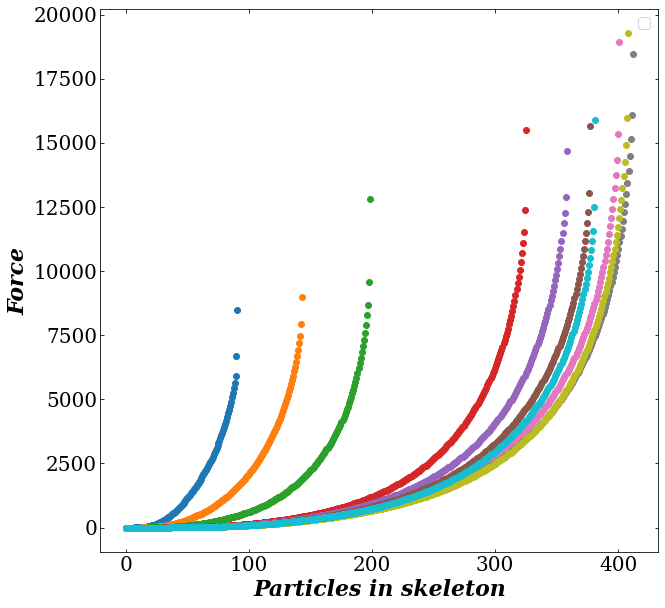

In [39]:
plt.figure(figsize = (10,10))
for i in range(len(r)):

    plt.scatter(f[i],r[i])
    plt.xlabel('Particles in skeleton',fontdict=fontlabel)
    plt.ylabel("Force",fontdict=fontlabel)
    plt.legend( loc = 'upper right',prop=fontlegend)
    plt.xticks(size = 20, family = 'serif', weight = 'normal')
    plt.yticks(size = 20, family = 'serif', weight = 'normal')
    plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )